In this script we will try some  visualization with the numeric variables

In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5.65e+06
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6.92e+06
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2.06e+06
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2.68e+06
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4.32e+06


In [82]:
train_numeric = train[train.columns[train.dtypes != 'object']]
train_numeric = train_numeric.drop(['Id'], axis=1 )
train_numeric.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,3.0,5,3,4,5,5,4,3,4,5.65e+06
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,3.0,0,0,0,0,0,0,0,0,6.92e+06
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,3.0,0,0,0,0,0,0,0,0,2.06e+06
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,7.5,25,12,10,6,18,12,12,6,2.68e+06
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,3.0,5,1,3,2,3,4,3,3,4.32e+06


### Data Description

In [83]:
pd.set_option('precision', 2)
print(train_numeric.iloc[:,:18].describe())

           P1      P2      P3      P4      P5      P6      P7      P8      P9  \
count  137.00  137.00  137.00  137.00  137.00  137.00  137.00  137.00  137.00   
mean     4.01    4.41    4.32    4.37    2.01    3.36    5.42    5.15    5.45   
std      2.91    1.51    1.03    1.02    1.21    2.13    2.30    1.86    1.83   
min      1.00    1.00    0.00    3.00    1.00    1.00    1.00    1.00    4.00   
25%      2.00    4.00    4.00    4.00    1.00    2.00    5.00    4.00    4.00   
50%      3.00    5.00    4.00    4.00    2.00    3.00    5.00    5.00    5.00   
75%      4.00    5.00    5.00    5.00    2.00    4.00    5.00    5.00    5.00   
max     12.00    7.50    7.50    7.50    8.00   10.00   10.00   10.00   10.00   

          P10     P11     P12     P13     P14     P15     P16     P17     P18  
count  137.00  137.00  137.00  137.00  137.00  137.00  137.00  137.00  137.00  
mean     5.49    3.26    5.30    5.08    1.42    1.39    1.94    1.04    1.94  
std      1.85    1.91    1.94 

In [84]:
print(train_numeric.iloc[:,18:].describe())

          P19     P20     P21     P22     P23     P24     P25     P26     P27  \
count  137.00  137.00  137.00  137.00  137.00  137.00  137.00  137.00  137.00   
mean     4.91    4.55    2.27    2.23    3.42    1.37    1.21    1.47    1.15   
std      5.60    3.71    2.05    1.23    4.56    2.30    2.13    2.61    2.07   
min      1.00    1.00    1.00    1.00    1.00    0.00    0.00    0.00    0.00   
25%      2.00    2.00    1.00    1.00    1.00    0.00    0.00    0.00    0.00   
50%      3.00    4.00    1.00    2.00    2.00    0.00    0.00    0.00    0.00   
75%      5.00    5.00    3.00    3.00    5.00    2.00    2.00    2.50    2.00   
max     25.00   15.00   15.00    5.00   25.00   10.00   10.00   12.50   12.50   

          P28     P29     P30     P31     P32     P33     P34     P35     P36  \
count  137.00  137.00  137.00  137.00  137.00  137.00  137.00  137.00  137.00   
mean     3.22    3.14    2.73    1.94    2.53    1.14    2.49    2.03    2.21   
std      2.31    1.68    5.

### Skew

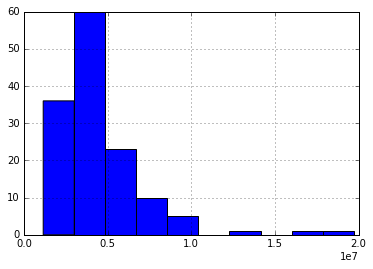

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
train_numeric['revenue'].hist()

In [86]:
train_numeric.revenue = np.log(train_numeric.revenue)

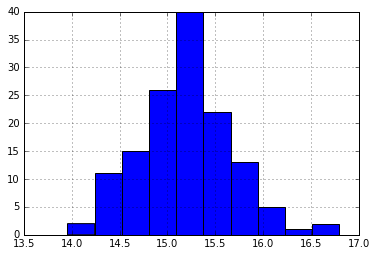

In [87]:
train_numeric['revenue'].hist()

In [88]:
X = train_numeric.drop(['revenue'], axis=1).values
y = train_numeric['revenue'].values
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cv_results = np.sqrt(-cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error'))
print('%f (%f)' % (cv_results.mean(), cv_results.std()))


0.667778 (0.170932)


In [89]:
test_numeric = test[test.columns[test.dtypes != 'object']]
test_X = test_numeric.drop(['Id'], axis=1).values
model = LinearRegression()
model.fit(X, y)
pred = np.exp(model.predict(test_X))

In [90]:
submission = pd.DataFrame({'Id': test.Id, 'Prediction': pred})
submission.to_csv('sub2.csv', index=False) # Score: 2315172.71236 and 2095 LB standing

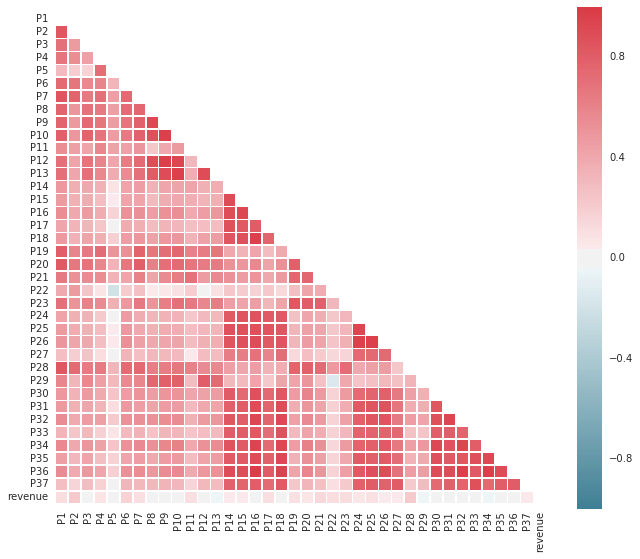

In [97]:
import seaborn as sns
sns.set(style="white")
corr = train_numeric.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, 
            linewidths=.5,  ax=ax)